# 5. Neural Network Modeling

Given that the time taken to train the models are considerable due to the dataset size, I would wanted to be able to run neural network models in parallel with the other models to be more time efficient. Therefore, the neural network modeling has been done in a separate notebook.

The following neural network models will be trained:

- Feed forward neural network
  - Vanilla model
  - Vanilla model with batch normalization
  - model with weight regularization
  - model with dropout regularization
  
The results of these 4 models will then be compared against the other models in the other notebook and we will pick the model with the lowest RMSE score for the test dataset.

# Imports

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow

In [2]:
# set random seed to reproduce models
tensorflow.random.set_seed(0)
seed(0)

# Functions

In [3]:
def append_result(result, train_score, train_rmse, test_score, test_rmse, time, model):
    '''returns a score table for each model. The scores consist of train and test set's r2 score and RMSE '''
    tmp = pd.DataFrame({
        'model': model,
        'train_r2_score': train_score,
        'train_rmse': round(train_rmse, 2),
        'test_r2_score': test_score,
        'test_rmse': round(test_rmse, 2), 
        'fit_time (min)': round(time, 2)
    },index=[0])
    
    result = pd.concat([result, tmp], axis=0, ignore_index=True)
    return result

# Reading data

In [4]:
X_train = pd.read_csv('../datasets/final/X_train.csv')
X_test = pd.read_csv('../datasets/final/X_test.csv')
y_train = pd.read_csv('../datasets/final/y_train.csv')
y_test = pd.read_csv('../datasets/final/y_test.csv')

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(154643, 58) (51548, 58) (154643, 1) (51548, 1)


# Preprocessing

In [6]:
# using ColumnTransformer to standardscale only the continuous columns and not dummy columns

ct = ColumnTransformer([
    ('transform', StandardScaler(), ['age', 'floor_area_sqf',
       'nearest_mrt_station_dist', 'nearest_primary_school_dist',
       'nearest_secondary_school_dist', 'nearest_mall_dist', 'dist_cbd',
       'avg_storey'])
], remainder='passthrough')

In [7]:
X_train_sc = ct.fit_transform(X_train)
X_test_sc = ct.transform(X_test)

In [8]:
X_train_sc.shape

(154643, 58)

# Feed Forward Neural network

## Vanilla model

In [9]:
model = Sequential()

In [10]:
# 1 input layer, 4 hidden layers, 1 output layer

# 1 input layer
model.add(Dense(150, activation='relu', input_shape=(58,)))

# 1 hidden layer
model.add(Dense(75, activation='relu'))

# 1 hidden layer
model.add(Dense(35, activation='relu'))

# 1 hidden layer
model.add(Dense(15, activation='relu'))

# 1 hidden layer
model.add(Dense(5, activation='relu'))

# output layer
model.add(Dense(1))

In [11]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[RootMeanSquaredError()]
)

We will be applying EarlyStopping as well. It stops the training process early. Instead of continuing training through every epoch, once the validation error begins to increase, our algorithm stops because it has (in theory) found the minimum for the validation loss.

In [12]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta=0, patience=5)   

It will monitor the validation loss, patience means the number of epochs it will tolerate for no improvement in validation error. The parameter min_delta refers to the minimum change in the monitored quantity to qualify as an improvement.

We will be monitoring our val_root_mean_squared_error as the metric for the above parameters. 

In [13]:
start = time.time()
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
                    epochs=100, batch_size=512, callbacks=[early_stop])
end = time.time()

Epoch 1/100
303/303 [==============================] - 1s 3ms/step - loss: 126585389056.0000 - root_mean_squared_error: 355788.4062 - val_loss: 18593705984.0000 - val_root_mean_squared_error: 136358.7344
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 11774578688.0000 - root_mean_squared_error: 108510.7344 - val_loss: 5893177344.0000 - val_root_mean_squared_error: 76767.0312
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 3749067776.0000 - root_mean_squared_error: 61229.6328 - val_loss: 2881739008.0000 - val_root_mean_squared_error: 53681.8320
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 2708897280.0000 - root_mean_squared_error: 52047.0664 - val_loss: 2511133184.0000 - val_root_mean_squared_error: 50111.2070
Epoch 5/100
303/303 [==============================] - 1s 4ms/step - loss: 2376331008.0000 - root_mean_squared_error: 48747.6250 - val_loss: 2200758528.0000 - val_root_mean_squared_error: 46912.242

303/303 [==============================] - 1s 4ms/step - loss: 954205696.0000 - root_mean_squared_error: 30890.2207 - val_loss: 942765824.0000 - val_root_mean_squared_error: 30704.4922
Epoch 43/100
303/303 [==============================] - 1s 4ms/step - loss: 948407040.0000 - root_mean_squared_error: 30796.2188 - val_loss: 943678144.0000 - val_root_mean_squared_error: 30719.3457
Epoch 44/100
303/303 [==============================] - 1s 4ms/step - loss: 944331072.0000 - root_mean_squared_error: 30729.9707 - val_loss: 947925248.0000 - val_root_mean_squared_error: 30788.3945
Epoch 45/100
303/303 [==============================] - 1s 3ms/step - loss: 938383680.0000 - root_mean_squared_error: 30633.0488 - val_loss: 930425856.0000 - val_root_mean_squared_error: 30502.8828
Epoch 46/100
303/303 [==============================] - 1s 3ms/step - loss: 934389184.0000 - root_mean_squared_error: 30567.7793 - val_loss: 926520192.0000 - val_root_mean_squared_error: 30438.7949
Epoch 47/100
303/303 [=

303/303 [==============================] - 1s 3ms/step - loss: 808225344.0000 - root_mean_squared_error: 28429.3047 - val_loss: 808780672.0000 - val_root_mean_squared_error: 28439.0703
Epoch 84/100
303/303 [==============================] - 1s 3ms/step - loss: 804746688.0000 - root_mean_squared_error: 28368.0566 - val_loss: 839233536.0000 - val_root_mean_squared_error: 28969.5273
Epoch 85/100
303/303 [==============================] - 1s 3ms/step - loss: 803236800.0000 - root_mean_squared_error: 28341.4316 - val_loss: 810511744.0000 - val_root_mean_squared_error: 28469.4883
Epoch 86/100
303/303 [==============================] - 1s 4ms/step - loss: 803465088.0000 - root_mean_squared_error: 28345.4590 - val_loss: 810546048.0000 - val_root_mean_squared_error: 28470.0898
Epoch 87/100
303/303 [==============================] - 1s 3ms/step - loss: 800246336.0000 - root_mean_squared_error: 28288.6250 - val_loss: 820413696.0000 - val_root_mean_squared_error: 28642.8652
Epoch 88/100
303/303 [=

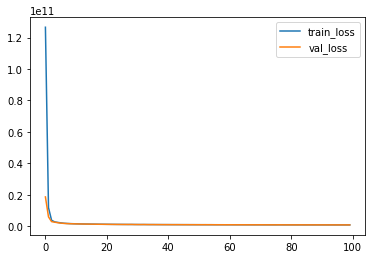

In [14]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(test_loss, label='val_loss')

plt.legend();

In [15]:
train_score = r2_score(y_train, model.predict(X_train_sc))
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train_sc)))
test_score = r2_score(y_test, model.predict(X_test_sc))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_sc)))
fit_time = (end - start) / 60

In [16]:
results_df = pd.DataFrame(columns=[
    'model',
    'train_r2_score',
    'train_rmse',
    'test_r2_score',
    'test_rmse',
    'fit_time (min)'
])

In [17]:
results_df = append_result(results_df, train_score, train_rmse, test_score, test_rmse, fit_time, 
                           'Vanilla Neural Network')
results_df

,model,train_r2_score,train_rmse,test_r2_score,test_rmse,fit_time (min)
0,Vanilla Neural Network,0.963026,27733.86,0.961623,28007.8,1.71


## Model with batch normalization

[Batch normalization](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/) is a technique to help coordinate the update of multiple layers in the model.

It does this scaling the output of the layer, specifically by standardizing the activations of each input variable per mini-batch, such as the activations of a node from the previous layer. Standardization refers to rescaling data to have a mean of zero and a standard deviation of one.

Standardizing the activations of the prior layer means that assumptions the subsequent layer makes about the spread and distribution of inputs during the weight update will not change, at least not dramatically. This has the effect of stabilizing and speeding-up the training process of deep neural networks.

Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer.

It may be appropriate <b>before the activation function</b> for activations that may result in non-Gaussian distributions like the rectified linear (ReLU) activation function, the modern default for most network types.

In [18]:
model = Sequential()

In [19]:
# 1 input layer, 4 hidden layers, 1 output layer

# 1 input layer
model.add(Dense(150, activation='relu', input_shape=(58,)))

# 1 hidden layer
BatchNormalization()
model.add(Dense(75, activation='relu'))

# 1 hidden layer
BatchNormalization()
model.add(Dense(35, activation='relu'))

# 1 hidden layer
BatchNormalization()
model.add(Dense(15, activation='relu'))

# 1 hidden layer
BatchNormalization()
model.add(Dense(5, activation='relu'))

# output layer
model.add(Dense(1))

In [20]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[RootMeanSquaredError()]
)

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta=0, patience=5)   

In [21]:
start = time.time()
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
                    epochs=100, batch_size=512, callbacks=[early_stop])
end = time.time()

Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 147031457792.0000 - root_mean_squared_error: 383446.8125 - val_loss: 21983039488.0000 - val_root_mean_squared_error: 148266.7812
Epoch 2/100
303/303 [==============================] - 1s 4ms/step - loss: 15927811072.0000 - root_mean_squared_error: 126205.4297 - val_loss: 10402204672.0000 - val_root_mean_squared_error: 101991.1953
Epoch 3/100
303/303 [==============================] - 1s 4ms/step - loss: 6430340608.0000 - root_mean_squared_error: 80189.4062 - val_loss: 3678793472.0000 - val_root_mean_squared_error: 60653.0586
Epoch 4/100
303/303 [==============================] - 1s 4ms/step - loss: 3140649216.0000 - root_mean_squared_error: 56041.4961 - val_loss: 2849327104.0000 - val_root_mean_squared_error: 53379.0898
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 2731719168.0000 - root_mean_squared_error: 52265.8516 - val_loss: 2576891392.0000 - val_root_mean_squared_error: 50763.0

Epoch 42/100
303/303 [==============================] - 1s 4ms/step - loss: 1106318848.0000 - root_mean_squared_error: 33261.3711 - val_loss: 1089734144.0000 - val_root_mean_squared_error: 33011.1211
Epoch 43/100
303/303 [==============================] - 1s 4ms/step - loss: 1099746560.0000 - root_mean_squared_error: 33162.4258 - val_loss: 1084558208.0000 - val_root_mean_squared_error: 32932.6328
Epoch 44/100
303/303 [==============================] - 1s 4ms/step - loss: 1093302016.0000 - root_mean_squared_error: 33065.1172 - val_loss: 1082559872.0000 - val_root_mean_squared_error: 32902.2773
Epoch 45/100
303/303 [==============================] - 1s 4ms/step - loss: 1087001088.0000 - root_mean_squared_error: 32969.6992 - val_loss: 1075220224.0000 - val_root_mean_squared_error: 32790.5508
Epoch 46/100
303/303 [==============================] - 1s 4ms/step - loss: 1080609408.0000 - root_mean_squared_error: 32872.6250 - val_loss: 1076673024.0000 - val_root_mean_squared_error: 32812.6953


303/303 [==============================] - 1s 4ms/step - loss: 916034048.0000 - root_mean_squared_error: 30266.0547 - val_loss: 907711296.0000 - val_root_mean_squared_error: 30128.2480
Epoch 84/100
303/303 [==============================] - 1s 3ms/step - loss: 913725504.0000 - root_mean_squared_error: 30227.8926 - val_loss: 916612928.0000 - val_root_mean_squared_error: 30275.6152
Epoch 85/100
303/303 [==============================] - 1s 3ms/step - loss: 912076544.0000 - root_mean_squared_error: 30200.6055 - val_loss: 905062720.0000 - val_root_mean_squared_error: 30084.2598
Epoch 86/100
303/303 [==============================] - 1s 4ms/step - loss: 912533632.0000 - root_mean_squared_error: 30208.1719 - val_loss: 905825984.0000 - val_root_mean_squared_error: 30096.9434
Epoch 87/100
303/303 [==============================] - 1s 4ms/step - loss: 909424448.0000 - root_mean_squared_error: 30156.6660 - val_loss: 914737088.0000 - val_root_mean_squared_error: 30244.6211
Epoch 88/100
303/303 [=

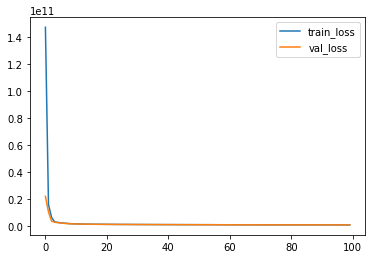

In [22]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(test_loss, label='val_loss')

plt.legend();

In [23]:
train_score = r2_score(y_train, model.predict(X_train_sc))
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train_sc)))
test_score = r2_score(y_test, model.predict(X_test_sc))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_sc)))
fit_time = (end - start) / 60

In [24]:
results_df = append_result(results_df, train_score, train_rmse, test_score, test_rmse, fit_time, 
                           'Neural Network (w/ Batch Normalization)')
results_df

,model,train_r2_score,train_rmse,test_r2_score,test_rmse,fit_time (min)
0,Vanilla Neural Network,0.963026,27733.86,0.961623,28007.80,1.71
1,Neural Network (w/ Batch Normalization),0.958040,29544.51,0.957061,29625.67,1.79


Interestingly, I did trials for BatchNormalization before and after the activation functions of each hidden layers. There were no significant difference in results.

## Model with weight regularization

Weight regularization provides an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data, such as the holdout test set.

The most common type of regularization is L2, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.

I will run the model with and without batch normalization to check out which result is better.

In [25]:
model_l2 = Sequential()

In [26]:
reg_value = 0.001

# when value = 0.001, val_rmse goes to about 27-28k+ 
# when value = 0.005, val_rmse goes to about 27-28k+ but is marginally better
# when value = 0.01, val_rmse goes to about 27-28k+  

# with batch normalization
# performs slightly worse

In [27]:
# 1 input layer, 4 hidden layers, 1 output layer

# 1 input layer
model_l2.add(Dense(150, activation='relu', input_shape=(58,), kernel_regularizer=l2(reg_value)))

# 1 hidden layer
#BatchNormalization()
model_l2.add(Dense(75, activation='relu', kernel_regularizer=l2(reg_value)))

# 1 hidden layer
#BatchNormalization()
model_l2.add(Dense(35, activation='relu', kernel_regularizer=l2(reg_value)))

# 1 hidden layer
#BatchNormalization()
model_l2.add(Dense(15, activation='relu', kernel_regularizer=l2(reg_value)))

# 1 hidden layer
#BatchNormalization()
model_l2.add(Dense(5, activation='relu', kernel_regularizer=l2(reg_value)))

# output layer
model_l2.add(Dense(1))

In [28]:
model_l2.compile(
    optimizer='adam',
    loss='mse',
    metrics=[RootMeanSquaredError()]
)

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta=0, patience=5)   

In [29]:
start = time.time()
history_l2 = model_l2.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
                          epochs=100, batch_size=512, callbacks=[early_stop])
end = time.time()

Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 130483609600.0000 - root_mean_squared_error: 361225.1562 - val_loss: 19604070400.0000 - val_root_mean_squared_error: 140014.5312
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 13342171136.0000 - root_mean_squared_error: 115508.3125 - val_loss: 7810574336.0000 - val_root_mean_squared_error: 88377.4531
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 4826526208.0000 - root_mean_squared_error: 69473.2031 - val_loss: 3197671680.0000 - val_root_mean_squared_error: 56547.9609
Epoch 4/100
303/303 [==============================] - 1s 4ms/step - loss: 2922668288.0000 - root_mean_squared_error: 54061.7070 - val_loss: 2684041728.0000 - val_root_mean_squared_error: 51807.7383
Epoch 5/100
303/303 [==============================] - 1s 4ms/step - loss: 2541869568.0000 - root_mean_squared_error: 50416.9570 - val_loss: 2360541440.0000 - val_root_mean_squared_error: 48585.402

303/303 [==============================] - 1s 4ms/step - loss: 973712512.0000 - root_mean_squared_error: 31204.3672 - val_loss: 960217280.0000 - val_root_mean_squared_error: 30987.3730
Epoch 43/100
303/303 [==============================] - 1s 4ms/step - loss: 964881152.0000 - root_mean_squared_error: 31062.5371 - val_loss: 951981440.0000 - val_root_mean_squared_error: 30854.1973
Epoch 44/100
303/303 [==============================] - 1s 4ms/step - loss: 957860992.0000 - root_mean_squared_error: 30949.3301 - val_loss: 953547520.0000 - val_root_mean_squared_error: 30879.5645
Epoch 45/100
303/303 [==============================] - 1s 4ms/step - loss: 949666688.0000 - root_mean_squared_error: 30816.6621 - val_loss: 945653888.0000 - val_root_mean_squared_error: 30751.4863
Epoch 46/100
303/303 [==============================] - 1s 4ms/step - loss: 941947328.0000 - root_mean_squared_error: 30691.1602 - val_loss: 933489216.0000 - val_root_mean_squared_error: 30553.0566
Epoch 47/100
303/303 [=

303/303 [==============================] - 1s 3ms/step - loss: 788797440.0000 - root_mean_squared_error: 28085.5371 - val_loss: 791039808.0000 - val_root_mean_squared_error: 28125.4297
Epoch 84/100
303/303 [==============================] - 1s 3ms/step - loss: 786100032.0000 - root_mean_squared_error: 28037.4746 - val_loss: 810896704.0000 - val_root_mean_squared_error: 28476.2480
Epoch 85/100
303/303 [==============================] - 1s 4ms/step - loss: 784209536.0000 - root_mean_squared_error: 28003.7422 - val_loss: 804171840.0000 - val_root_mean_squared_error: 28357.9238
Epoch 86/100
303/303 [==============================] - 1s 4ms/step - loss: 784316992.0000 - root_mean_squared_error: 28005.6602 - val_loss: 786634816.0000 - val_root_mean_squared_error: 28047.0117
Epoch 87/100
303/303 [==============================] - 1s 4ms/step - loss: 780064384.0000 - root_mean_squared_error: 27929.6328 - val_loss: 803217536.0000 - val_root_mean_squared_error: 28341.0918
Epoch 88/100
303/303 [=

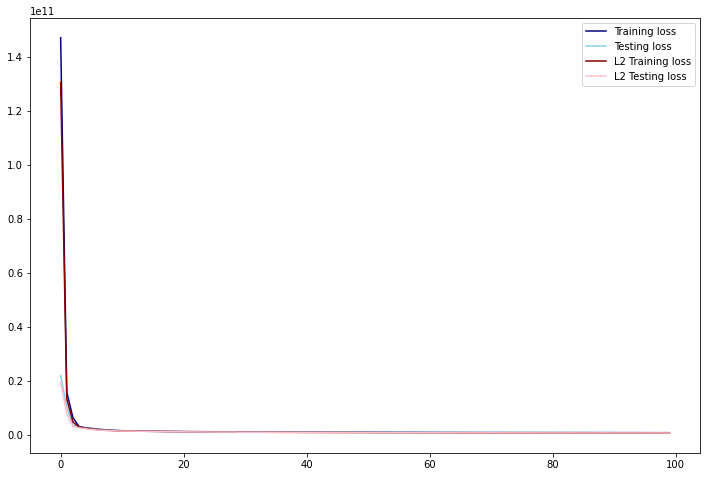

In [30]:
# Visualize loss
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='darkred')
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.legend();

In [31]:
train_score = r2_score(y_train, model_l2.predict(X_train_sc))
train_rmse = np.sqrt(mean_squared_error(y_train, model_l2.predict(X_train_sc)))
test_score = r2_score(y_test, model_l2.predict(X_test_sc))
test_rmse = np.sqrt(mean_squared_error(y_test, model_l2.predict(X_test_sc)))
fit_time = (end - start) / 60

In [32]:
results_df = append_result(results_df, train_score, train_rmse, test_score, test_rmse, fit_time, 
                           'Neural Network with Weight Decay')
results_df

,model,train_r2_score,train_rmse,test_r2_score,test_rmse,fit_time (min)
0,Vanilla Neural Network,0.963026,27733.86,0.961623,28007.80,1.71
1,Neural Network (w/ Batch Normalization),0.958040,29544.51,0.957061,29625.67,1.79
2,Neural Network with Weight Decay,0.963994,27368.31,0.962612,27644.58,1.82


## Model with dropout regularization

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, these units are not considered during a particular forward pass.

I will run the model with and without batch normalization to check out which result is better.

In [33]:
dropout_val = 0.001

# RMSE scores
# w/o batch normalization
# 0.1   50k+
# 0.01  31k+
# 0.001 28k+, marginally performs the best

# with batch normalization, the model marginally improves

In [34]:
model_dropout = Sequential()

# 1 input layer, 4 hidden layers, 1 output layer

# 1 input layer
model_dropout.add(Dense(150, activation='relu', input_shape=(58,)))

# 1 hidden layer
BatchNormalization()
model_dropout.add(Dense(75, activation='relu'))
model_dropout.add(Dropout(dropout_val))

# 1 hidden layer
BatchNormalization()
model_dropout.add(Dense(35, activation='relu'))
model_dropout.add(Dropout(dropout_val))

# 1 hidden layer
BatchNormalization()
model_dropout.add(Dense(15, activation='relu'))
model_dropout.add(Dropout(dropout_val))

# 1 hidden layer
BatchNormalization()
model_dropout.add(Dense(5, activation='relu'))
model_dropout.add(Dropout(dropout_val))

# output layer
model_dropout.add(Dense(1))

In [35]:
model_dropout.compile(
    optimizer='adam',
    loss='mse',
    metrics=[RootMeanSquaredError()]
)

early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta=0, patience=5)   

In [36]:
start = time.time()
history_dropout = model_dropout.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
                                    epochs=100, batch_size=512, callbacks=[early_stop])
end = time.time()

Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 144827416576.0000 - root_mean_squared_error: 380561.9688 - val_loss: 21490806784.0000 - val_root_mean_squared_error: 146597.4375
Epoch 2/100
303/303 [==============================] - 1s 4ms/step - loss: 15527372800.0000 - root_mean_squared_error: 124608.8828 - val_loss: 9583760384.0000 - val_root_mean_squared_error: 97896.6797
Epoch 3/100
303/303 [==============================] - 2s 5ms/step - loss: 5929439744.0000 - root_mean_squared_error: 77002.8516 - val_loss: 3380088576.0000 - val_root_mean_squared_error: 58138.5273
Epoch 4/100
303/303 [==============================] - 1s 5ms/step - loss: 3194093824.0000 - root_mean_squared_error: 56516.3164 - val_loss: 2774637056.0000 - val_root_mean_squared_error: 52674.8242
Epoch 5/100
303/303 [==============================] - 2s 6ms/step - loss: 2832665344.0000 - root_mean_squared_error: 53222.7891 - val_loss: 2474790400.0000 - val_root_mean_squared_error: 49747.265

Epoch 42/100
303/303 [==============================] - 1s 4ms/step - loss: 1191784192.0000 - root_mean_squared_error: 34522.2266 - val_loss: 1009047680.0000 - val_root_mean_squared_error: 31765.5117
Epoch 43/100
303/303 [==============================] - 1s 5ms/step - loss: 1190293376.0000 - root_mean_squared_error: 34500.6289 - val_loss: 999301888.0000 - val_root_mean_squared_error: 31611.7363
Epoch 44/100
303/303 [==============================] - 1s 4ms/step - loss: 1159874816.0000 - root_mean_squared_error: 34056.9336 - val_loss: 1007109696.0000 - val_root_mean_squared_error: 31734.9922
Epoch 45/100
303/303 [==============================] - 1s 5ms/step - loss: 1172734720.0000 - root_mean_squared_error: 34245.2148 - val_loss: 999174464.0000 - val_root_mean_squared_error: 31609.7207
Epoch 46/100
303/303 [==============================] - 1s 4ms/step - loss: 1182147584.0000 - root_mean_squared_error: 34382.3750 - val_loss: 985764032.0000 - val_root_mean_squared_error: 31396.8789
Epo

303/303 [==============================] - 1s 4ms/step - loss: 1021479616.0000 - root_mean_squared_error: 31960.5957 - val_loss: 863718976.0000 - val_root_mean_squared_error: 29389.0957
Epoch 84/100
303/303 [==============================] - 2s 5ms/step - loss: 1018118592.0000 - root_mean_squared_error: 31907.9707 - val_loss: 870942720.0000 - val_root_mean_squared_error: 29511.7383
Epoch 85/100
303/303 [==============================] - 1s 4ms/step - loss: 1028315328.0000 - root_mean_squared_error: 32067.3555 - val_loss: 858997248.0000 - val_root_mean_squared_error: 29308.6543
Epoch 86/100
303/303 [==============================] - 2s 6ms/step - loss: 1025445568.0000 - root_mean_squared_error: 32022.5781 - val_loss: 852077632.0000 - val_root_mean_squared_error: 29190.3691
Epoch 87/100
303/303 [==============================] - 1s 4ms/step - loss: 1024842112.0000 - root_mean_squared_error: 32013.1562 - val_loss: 857291968.0000 - val_root_mean_squared_error: 29279.5488
Epoch 88/100
303/3

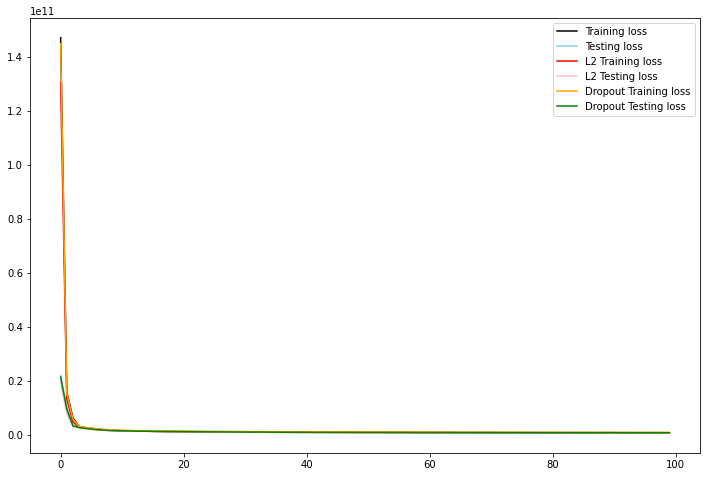

In [37]:
# Visualize loss
train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='black')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='red')
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.plot(train_loss_dropout, label='Dropout Training loss', color='orange')
plt.plot(test_loss_dropout, label='Dropout Testing loss', color='green')

plt.legend();

In [38]:
train_score = r2_score(y_train, model_dropout.predict(X_train_sc))
train_rmse = np.sqrt(mean_squared_error(y_train, model_dropout.predict(X_train_sc)))
test_score = r2_score(y_test, model_dropout.predict(X_test_sc))
test_rmse = np.sqrt(mean_squared_error(y_test, model_dropout.predict(X_test_sc)))
fit_time = (end - start) / 60

In [39]:
results_df = append_result(results_df, train_score, train_rmse, test_score, test_rmse, fit_time, 
                           'Neural Network with Dropout')
results_df

,model,train_r2_score,train_rmse,test_r2_score,test_rmse,fit_time (min)
0,Vanilla Neural Network,0.963026,27733.86,0.961623,28007.80,1.71
1,Neural Network (w/ Batch Normalization),0.958040,29544.51,0.957061,29625.67,1.79
2,Neural Network with Weight Decay,0.963994,27368.31,0.962612,27644.58,1.82
3,Neural Network with Dropout,0.960745,28576.52,0.959674,28710.22,2.44


In [40]:
results_df.index = [7, 8, 9, 10]
results_df

,model,train_r2_score,train_rmse,test_r2_score,test_rmse,fit_time (min)
7,Vanilla Neural Network,0.963026,27733.86,0.961623,28007.80,1.71
8,Neural Network (w/ Batch Normalization),0.958040,29544.51,0.957061,29625.67,1.79
9,Neural Network with Weight Decay,0.963994,27368.31,0.962612,27644.58,1.82
10,Neural Network with Dropout,0.960745,28576.52,0.959674,28710.22,2.44


# Notes on Neural Network

- Every run of NN is subjected to a portion of [randomness](https://towardsdatascience.com/how-to-solve-randomness-in-an-artificial-neural-network-3befc4f27d45). These randomness can be due to random initialization of weights and bias or randomness in regularization like dropouts
    - There are some occasions where RMSE can considerably spike up to 10 times the usual ones, even without adjusting any parameters and just repeating the training
    - We can consider using an ensemble method to loop the NN runs and calculate the average RMSE instead. Bear in mind that by this will increase the runtime as we are looping the model
    - I recently realized that we are actually able to set a random seed using tensorflow and numpy libaries. However, the results aren't entirely replicable but it is not as volatile as before
- Having more layers compared to more epochs is more meaningful in reducing the loss metric: RMSE
- From personal experience, having too many layers seem to cause more fluctuation in model results
- More layers does not always equate to better results
    - with 12 layers, the test RMSE were ranging around 27,000+ for all 3 NNs
    - with 8 layers, the test RMSE were ranging around 26,000+ for all 3 NNs 
    - with 4 layers in the finalized models, the test RMSE ranged around 28,000 but the results were more consistent when rerunning the notebook
    - too many layers might actually create worse results as the network starts to train on the noise
    - a lower number of layers (2-4) seems more suitable for financial, pricing related data

- Batch normalization had no improvement in results
- Overall, compared to the other models, it performs better compared to Linear Regression models but not as good as the advanced supervised learning models like Random Forest and XG Boost 
- Perhaps my dataset needs to be more complex e.g. have more features or more rows in order for NN to be more relevant